In [71]:
import gc

gc.collect()

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from math import pi
import matplotlib.patches as patches

In [72]:
def make_second_bottom_spine(ax=None, label=None, offset=0, labeloffset=20):
    """Makes a second bottom spine"""
    if ax is None:
        ax = plt.gca()
    second_bottom = mpl.spines.Spine(ax, "bottom", ax.spines["bottom"]._path)
    second_bottom.set_position(("outward", offset))
    ax.spines["second_bottom"] = second_bottom

    if label is not None:
        # Make a new xlabel
        ax.annotate(
            label,
            xy=(0.5, 0),
            xycoords="axes fraction",
            xytext=(0, -labeloffset),
            textcoords="offset points",
            verticalalignment="top",
            horizontalalignment="center",
        )


def annotate_group(name, xspan, ax=None):
    """Annotates a span of the x-axis"""

    def annotate(ax, name, left, right, y, pad):
        arrow = ax.annotate(
            name,
            xy=(left, y),
            xycoords="data",
            xytext=(right, y - pad),
            textcoords="data",
            annotation_clip=False,
            verticalalignment="top",
            horizontalalignment="center",
            linespacing=2.0,
            arrowprops=dict(
                arrowstyle="-",
                shrinkA=0,
                shrinkB=0,
                connectionstyle="angle,angleB=90,angleA=0,rad=5",
            ),
        )
        return arrow

    if ax is None:
        ax = plt.gca()
    ymin = ax.get_ylim()[0]
    ypad = 0.01 * np.ptp(ax.get_ylim())
    xcenter = np.mean(xspan)
    left_arrow = annotate(ax, name, xspan[0], xcenter, ymin, ypad)
    right_arrow = annotate(ax, name, xspan[1], xcenter, ymin, ypad)
    return left_arrow, right_arrow

In [73]:
# filename = "/home/jovyan/visualization/dhiraj/data/clean/air_temperature.csv"
filename = "data/clean/air_temperature.csv"
df = pd.read_csv(filename)

df["DATE"] = pd.to_datetime(df["TIME"]).dt.date
df["YEAR"] = pd.to_datetime(df["TIME"]).dt.year
df["MONTH"] = pd.to_datetime(df["TIME"]).dt.month

In [74]:
df_max = df[["VALUES", "DATE"]].groupby(["DATE"], as_index=False)["VALUES"].max()

# fig = go.Figure(px.scatter(x = df_max['DATE'], y = df_max['VALUES']))
fig = go.Figure(
    go.Scatter(
        x=df_max["DATE"],
        y=df_max["VALUES"],
        hovertemplate="<i>Date</i>: %{x|%Y-%m-%d}<br>"
        + "<i>Temp</i>: %{y}\u2103<br></br>"
        + "<extra></extra>",
    )
)
fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(
    title="Maximum Air Temperature of each day in Great Barrier Region (all data-points)",
    title_x=0.5,
    xaxis_title="Year",
    yaxis_title="Temperature (\u2103)",
    width=1200,
    height=700,
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
    ),
    font=dict(
        size=16,
    ),
)
fig.update_traces(mode="markers")
fig.show()

In [75]:
df_mean = df[["VALUES", "DATE"]].groupby(["DATE"], as_index=False)["VALUES"].mean()

fig = go.Figure(
    go.Scatter(
        x=df_mean["DATE"],
        y=df_mean["VALUES"],
        hovertemplate="<i>Date</i>: %{x|%Y-%m-%d}<br>"
        + "<i>Temp</i>: %{y}\u2103<br></br>"
        + "<extra></extra>",
    )
)

fig.update_xaxes(rangeslider_visible=True)

fig.update_layout(
    title="Average Air Temperature of each day in Great Barrier Region (all data-points)",
    title_x=0.5,
    xaxis_title="Year",
    yaxis_title="Temperature (\u2103)",
    width=1200,
    height=700,
    hoverlabel=dict(bgcolor="white", font_size=14),
    font=dict(size=16),
)
fig.update_traces(mode="markers")
fig.show()

In [76]:
def mean_count_weekly(df, year):
    df_ = df[df["YEAR"] == year]
    df_ = df_.reset_index(drop=True)
    df_.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
    df_["WEEK"] = pd.to_datetime(df_["TIME"]).dt.strftime("%V")
    df_weekly = (
        df_[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
    )
    return df_weekly


df_2022_weekly = mean_count_weekly(df, 2022)
df_2021_weekly = mean_count_weekly(df, 2021)
df_2020_weekly = mean_count_weekly(df, 2020)
df_2019_weekly = mean_count_weekly(df, 2019)
df_2018_weekly = mean_count_weekly(df, 2018)
df_2017_weekly = mean_count_weekly(df, 2017)
df_2016_weekly = mean_count_weekly(df, 2016)
df_2015_weekly = mean_count_weekly(df, 2015)

In [77]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_2022_weekly["WEEK"],
        y=df_2022_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2022<br>"
        + "<i>Av. Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        name="2022",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2021_weekly["WEEK"],
        y=df_2021_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2021<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        name="2021",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2020_weekly["WEEK"],
        y=df_2020_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2020<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        name="2020",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2019_weekly["WEEK"],
        y=df_2019_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2019<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        name="2019",
    )
)


fig.update_layout(
    title="Weekly Average Air Temperature in Great Barrier Region (2019-2022)",
    title_x=0.5,
    xaxis_title="Week number",
    yaxis_title="Temperature (\u2103)",
    width=1200,
    height=700,
    hoverlabel=dict(
        bgcolor="white",
        font_size=14,
    ),
    font=dict(
        size=16,
    ),
)
fig.update_traces(mode="markers", marker_size=10)
fig.update_xaxes(tickangle=-45)

fig.show()

In [78]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_2022_weekly["WEEK"],
        y=df_2022_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2022<br>"
        + "<i>Av. Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "silver"},
        name="2022",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2021_weekly["WEEK"],
        y=df_2021_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2021<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "silver"},
        name="2021",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2020_weekly["WEEK"],
        y=df_2020_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2020<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "orange"},
        name="2020",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2019_weekly["WEEK"],
        y=df_2019_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2019<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "silver"},
        name="2019",
    )
)


fig.update_layout(
    title="Weekly Average Air Temperature in Great Barrier Region (2019-2022)",
    title_x=0.5,
    xaxis_title="Week number",
    yaxis_title="Temperature (\u2103)",
    width=1200,
    height=700,
    hoverlabel=dict(bgcolor="white", font_size=14),
    font=dict(size=16),
)
fig.update_traces(mode="markers", marker_size=10)
fig.update_xaxes(tickangle=-45)

fig.show()

In [79]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_2022_weekly["WEEK"],
        y=df_2022_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2022<br>"
        + "<i>Av. Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "silver"},
        name="2022",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2021_weekly["WEEK"],
        y=df_2021_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2021<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "silver"},
        name="2021",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2020_weekly["WEEK"],
        y=df_2020_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2020<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "orange"},
        name="2020",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2019_weekly["WEEK"],
        y=df_2019_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2019<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "silver"},
        name="2019",
    )
)


fig.add_shape(
    type="circle",
    xref="x",
    yref="y",
    x0=5,
    y0=30,
    x1=7,
    y1=31,
    line_color="LightSeaGreen",
)

fig.add_annotation(
    x=5,
    y=31,
    text=f"Highest weekly recorded Temperature ever",
    yanchor="bottom",
    showarrow=True,
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#636363",
    ax=-20,
    ay=-30,
    font=dict(size=14, color="purple", family="Courier New, monospace"),
    align="left",
)

fig.update_layout(
    title="Weekly Average Air Temperature in Great Barrier Region (2019-2022)",
    title_x=0.5,
    xaxis_title="Week number",
    yaxis_title="Temperature (\u2103)",
    width=1200,
    height=700,
    hoverlabel=dict(bgcolor="white", font_size=14),
    font=dict(size=16),
)
fig.update_traces(mode="markers", marker_size=10)
fig.update_xaxes(tickangle=-45)

fig.show()

In [80]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_2022_weekly["WEEK"],
        y=df_2022_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2022<br>"
        + "<i>Av. Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "silver"},
        name="2022",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2021_weekly["WEEK"],
        y=df_2021_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2021<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "silver"},
        name="2021",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2020_weekly["WEEK"],
        y=df_2020_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2020<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "orange"},
        name="2020",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2019_weekly["WEEK"],
        y=df_2019_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2019<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "silver"},
        name="2019",
    )
)


fig.add_shape(
    type="circle",
    xref="x",
    yref="y",
    x0=2,
    y0=28,
    x1=8,
    y1=31,
    line_color="LightSeaGreen",
)

fig.add_annotation(
    x=4,
    y=31,
    text=f"Highest recorded weekly Temperature for a month",
    yanchor="bottom",
    showarrow=True,
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#636363",
    ax=-20,
    ay=-30,
    font=dict(size=14, color="purple", family="Courier New, monospace"),
    align="left",
)

fig.update_layout(
    title="Weekly Average Air Temperature in Great Barrier Region (2019-2022)",
    title_x=0.5,
    xaxis_title="Week number",
    yaxis_title="Temperature (\u2103)",
    width=1200,
    height=700,
    hoverlabel=dict(bgcolor="white", font_size=14),
    font=dict(size=16),
)
fig.update_traces(mode="markers", marker_size=10)
fig.update_xaxes(tickangle=-45)

fig.show()

In [81]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_2022_weekly["WEEK"],
        y=df_2022_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2022<br>"
        + "<i>Av. Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "orange"},
        name="2022",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2021_weekly["WEEK"],
        y=df_2021_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2021<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "silver"},
        name="2021",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2020_weekly["WEEK"],
        y=df_2020_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2020<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "silver"},
        name="2020",
    )
)

fig.add_trace(
    go.Scatter(
        x=df_2019_weekly["WEEK"],
        y=df_2019_weekly["VALUES"],
        hovertemplate="<i>Week</i>: %{x} of 2019<br>"
        + "<i>Avg Temp</i>: %{y:.2f}\u2103<br></br>"
        + "<extra></extra>",
        marker={"color": "silver"},
        name="2019",
    )
)


fig.add_shape(
    type="rect",
    xref="x",
    yref="y",
    x0=24,
    y0=18,
    x1=35,
    y1=22,
    line_color="LightSeaGreen",
)

fig.add_annotation(
    x=24,
    y=18,
    text=f"Low Temperature due to La Niña",
    yanchor="bottom",
    showarrow=True,
    arrowhead=1,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="#636363",
    ax=-40,
    ay=70,
    font=dict(size=14, color="purple", family="Courier New, monospace"),
    # align="left",
)

fig.update_layout(
    title="Weekly Average Air Temperature in Great Barrier Region (2019-2022)",
    title_x=0.5,
    xaxis_title="Week number",
    yaxis_title="Temperature (\u2103)",
    width=1200,
    height=700,
    hoverlabel=dict(bgcolor="white", font_size=14),
    font=dict(size=16),
)
fig.update_traces(mode="markers", marker_size=10)
fig.update_xaxes(tickangle=-45)

fig.show()

In [82]:
def max_count_daily(df, year, quarter=0):
    df_ = df[df["YEAR"] == year]
    df_ = df_.reset_index(drop=True)
    df_.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)

    if quarter == 1:
        df_1 = df_[df_["MONTH"] <= 3]
        max_df = (
            df_1[["VALUES", "DATE"]].groupby(["DATE"], as_index=False)["VALUES"].max()
        )

    if quarter == 2:
        df_1 = df_[(df_["MONTH"] > 3) & (df_["MONTH"] <= 6)]
        max_df = (
            df_1[["VALUES", "DATE"]].groupby(["DATE"], as_index=False)["VALUES"].max()
        )

    if quarter == 3:
        df_1 = df_[(df_["MONTH"] > 6) & (df_["MONTH"] <= 9)]
        max_df = (
            df_1[["VALUES", "DATE"]].groupby(["DATE"], as_index=False)["VALUES"].max()
        )

    if quarter == 4:
        df_1 = df_[(df_["MONTH"] > 9) & (df_["MONTH"] <= 12)]
        max_df = (
            df_1[["VALUES", "DATE"]].groupby(["DATE"], as_index=False)["VALUES"].max()
        )

    if quarter == 0:
        max_df = (
            df_[["VALUES", "DATE"]].groupby(["DATE"], as_index=False)["VALUES"].max()
        )

    count_26 = max_df[max_df["VALUES"] >= 26].shape[0]
    count_27 = max_df[max_df["VALUES"] >= 27].shape[0]
    count_28 = max_df[max_df["VALUES"] >= 28].shape[0]
    count_29 = max_df[max_df["VALUES"] >= 29].shape[0]
    count_30 = max_df[max_df["VALUES"] >= 30].shape[0]
    return [count_26, count_27, count_28, count_29, count_30]

In [83]:
fig = make_subplots(
    rows=4,
    cols=1,
    start_cell="top-left",
    subplot_titles=("2022", "2021", "2020", "2019"),
)

x_label = [
    "Greater than 26\u2103",
    "Greater than 27\u2103",
    "Greater than 28\u2103",
    "Greater than 29\u2103",
    "Greater than 30\u2103",
]

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2022),
        text=max_count_daily(df, 2022),
        textposition="auto",
        name="2022",
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2021),
        text=max_count_daily(df, 2021),
        textposition="auto",
    ),
    row=2,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2020),
        text=max_count_daily(df, 2020),
        textposition="auto",
    ),
    row=3,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2019),
        text=max_count_daily(df, 2019),
        textposition="auto",
    ),
    row=4,
    col=1,
)


fig.update_layout(
    title="Number of days of high Air Temperature in Great Barrier Region (2019-2022)",
    title_x=0.5,
    width=1200,
    height=700,
    showlegend=False,
    hoverlabel=dict(bgcolor="white", font_size=14),
    font=dict(size=16),
    plot_bgcolor="rgba(0,0,0,0)",
)

fig.update_yaxes(
    title_text="# days", title_standoff=5, title_font={"size": 16}, showgrid=False
)

fig.show()

In [84]:
fig = make_subplots(
    rows=4,
    cols=1,
    start_cell="top-left",
    subplot_titles=("2022", "2021", "2020", "2019"),
)

x_label = [
    "Greater than 26\u2103",
    "Greater than 27\u2103",
    "Greater than 28\u2103",
    "Greater than 29\u2103",
    "Greater than 30\u2103",
]

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2022),
        text=max_count_daily(df, 2022),
        textposition="auto",
        name="2022",
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2021),
        text=max_count_daily(df, 2021),
        textposition="auto",
    ),
    row=2,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2020),
        text=max_count_daily(df, 2020),
        textposition="auto",
    ),
    row=3,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2019),
        text=max_count_daily(df, 2019),
        textposition="auto",
    ),
    row=4,
    col=1,
)

# NOTE: I tried the following but this doesn't look so I edited the file in the Paint to add the box around the data of interest.
# fig.add_shape(
#     type="rect",
#     xref="x",
#     yref="y",
#     x0=10,
#     y0=10,
#     x1=20,
#     y1=60,
#     line_color="LightSeaGreen",
# )
# fig.add_vrect(
#     x0="Greater than 29\u2103",
#     x1="Greater than 30\u2103",
#     fillcolor="LightSalmon",
#     opacity=0.5,
#     # row=1,
#     # col=1,
#     layer="below",
#     line_width=0,
# )

shape_dict = {
    "type": "rect",
    "xref": "x",
    "yref": "paper",
    "x0": "Greater than 29\u2103",
    "x1": "Greater than 30\u2103",
    "y0": 0,
    "y1": 1,
    "fillcolor": "LightSalmon",
    "layer": "below",
    "opacity": 0.25,
    "line_width": 0,
}

fig.update_layout(
    title="Number of days of high Air Temperature in Great Barrier Region (2019-2022)",
    title_x=0.5,
    width=1500,
    height=700,
    showlegend=False,
    hoverlabel=dict(bgcolor="white", font_size=14),
    font=dict(size=16),
    plot_bgcolor="rgba(0,0,0,0)",
    shapes=[shape_dict],
)

fig.update_yaxes(
    title_text="# days", title_standoff=5, title_font={"size": 16}, showgrid=False
)

fig.show()

In [85]:
from collections import defaultdict
import plotly.express as px

data_dict = defaultdict(list)

data_dict["Year"].append(str(2019))
data_dict["Temperature"].append("Greater than 29\u2103")
data_dict["# Days"].append(max_count_daily(df, 2019)[3])
data_dict["Year"].append(str(2019))
data_dict["Temperature"].append("Greater than 30\u2103")
data_dict["# Days"].append(max_count_daily(df, 2019)[4])

data_dict["Year"].append(str(2020))
data_dict["Temperature"].append("Greater than 29\u2103")
data_dict["# Days"].append(max_count_daily(df, 2020)[3])
data_dict["Year"].append(str(2020))
data_dict["Temperature"].append("Greater than 30\u2103")
data_dict["# Days"].append(max_count_daily(df, 2020)[4])

data_dict["Year"].append(str(2021))
data_dict["Temperature"].append("Greater than 29\u2103")
data_dict["# Days"].append(max_count_daily(df, 2021)[3])
data_dict["Year"].append(str(2021))
data_dict["Temperature"].append("Greater than 30\u2103")
data_dict["# Days"].append(max_count_daily(df, 2021)[4])

data_dict["Year"].append(str(2022))
data_dict["Temperature"].append("Greater than 29\u2103")
data_dict["# Days"].append(max_count_daily(df, 2022)[3])
data_dict["Year"].append(str(2022))
data_dict["Temperature"].append("Greater than 30\u2103")
data_dict["# Days"].append(max_count_daily(df, 2022)[4])


data_df = pd.DataFrame.from_dict(data_dict)
fig = px.bar(
    data_df,
    x="Year",
    y="# Days",
    color="Temperature",
    title="Number of days of high Air Temperature in Great Barrier Region (2019-2022)",
    text_auto=True,
)

fig.update_layout(
    title_x=0.5,
    width=1200,
    height=700,
    # showlegend=False,
    # hoverlabel=dict(bgcolor="white", font_size=14),
    # font=dict(size=16),
    plot_bgcolor="rgba(0,0,0,0)",
)
fig.show()

In [86]:
fig = make_subplots(
    rows=4,
    cols=1,
    start_cell="top-left",
    subplot_titles=("2022", "2021", "2020", "2019"),
)

x_label = [
    "Greater than 26\u2103",
    "Greater than 27\u2103",
    "Greater than 28\u2103",
    "Greater than 29\u2103",
    "Greater than 30\u2103",
]
colors = ["blue", "orange", "yellow", "green"]

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2022, 1),
        text=max_count_daily(df, 2022, 1),
        textposition="auto",
        name="First Quarter (Jan-Mar)",
        marker_color="blue",
        legendgroup="group1",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2022, 2),
        text=max_count_daily(df, 2022, 2),
        textposition="auto",
        name="Second Quarter (Apr-Jun)",
        marker_color="orange",
        legendgroup="group2",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2022, 3),
        text=max_count_daily(df, 2022, 3),
        textposition="auto",
        name="Third Quarter (Jul-Sept)",
        marker_color="green",
        legendgroup="group3",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2022, 4),
        text=max_count_daily(df, 2022, 4),
        textposition="auto",
        name="Fourth Quarter (Oct-Dec)",
        marker_color="yellow",
        legendgroup="group4",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=1,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2021, 1),
        text=max_count_daily(df, 2021, 1),
        textposition="auto",
        name="2021",
        marker_color="blue",
        showlegend=False,
        legendgroup="group1",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=2,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2021, 2),
        text=max_count_daily(df, 2021, 2),
        textposition="auto",
        name="2021",
        marker_color="orange",
        showlegend=False,
        legendgroup="group2",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=2,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2021, 3),
        text=max_count_daily(df, 2021, 3),
        textposition="auto",
        name="2021",
        marker_color="green",
        showlegend=False,
        legendgroup="group3",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=2,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2021, 4),
        text=max_count_daily(df, 2021, 4),
        textposition="auto",
        name="2021",
        marker_color="yellow",
        showlegend=False,
        legendgroup="group4",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=2,
    col=1,
)


fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2020, 1),
        text=max_count_daily(df, 2020, 1),
        textposition="auto",
        name="2020",
        marker_color="blue",
        showlegend=False,
        legendgroup="group1",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=3,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2020, 2),
        text=max_count_daily(df, 2020, 2),
        textposition="auto",
        name="2020",
        marker_color="orange",
        showlegend=False,
        legendgroup="group2",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=3,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2020, 3),
        text=max_count_daily(df, 2020, 3),
        textposition="auto",
        name="2020",
        marker_color="green",
        showlegend=False,
        legendgroup="group3",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=3,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2020, 4),
        text=max_count_daily(df, 2020, 4),
        textposition="auto",
        name="2020",
        marker_color="yellow",
        showlegend=False,
        legendgroup="group4",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=3,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2019, 1),
        text=max_count_daily(df, 2019, 1),
        textposition="auto",
        name="2019",
        marker_color="blue",
        showlegend=False,
        legendgroup="group1",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=4,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2019, 2),
        text=max_count_daily(df, 2019, 2),
        textposition="auto",
        name="2019",
        marker_color="orange",
        showlegend=False,
        legendgroup="group2",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=4,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2019, 3),
        text=max_count_daily(df, 2019, 3),
        textposition="auto",
        name="2019",
        marker_color="green",
        showlegend=False,
        legendgroup="group3",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=4,
    col=1,
)

fig.add_trace(
    go.Bar(
        x=x_label,
        y=max_count_daily(df, 2019, 4),
        text=max_count_daily(df, 2019, 4),
        textposition="auto",
        name="2019",
        marker_color="yellow",
        showlegend=False,
        legendgroup="group4",
        hovertemplate="%{y} days had temp %{x}<br>" + "<extra></extra>",
    ),
    row=4,
    col=1,
)


fig.update_layout(
    title="Number of days of high temperature (per quarter) in Great Barrier Region (2019-2022)",
    title_x=0.5,
    width=1200,
    height=700,
    # showlegend=False,
    hoverlabel=dict(bgcolor="white", font_size=14),
    font=dict(size=16),
    plot_bgcolor="rgba(0,0,0,0)",
)

fig.update_yaxes(
    title_text="# days", title_standoff=5, title_font={"size": 16}, showgrid=False
)

fig.show()

#### Percentage of Relative Humidity


In [87]:
# filename = (
#     "/home/jovyan/visualization/dhiraj/data/clean/percentage_relative_humidity.csv"
# )
filename = "data/clean/percentage_relative_humidity.csv"
df = pd.read_csv(filename)
df["DATE"] = pd.to_datetime(df["TIME"]).dt.date
df["YEAR"] = pd.to_datetime(df["TIME"]).dt.year
df["MONTH"] = pd.to_datetime(df["TIME"]).dt.month
# df["YEAR"].value_counts()

In [88]:
df_2022 = df[df["YEAR"] == 2022]
df_2022 = df_2022.reset_index(drop=True)
df_2022.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2022["WEEK"] = pd.to_datetime(df_2022["TIME"]).dt.strftime("%V")
df_2022_weekly = (
    df_2022[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2021 = df[df["YEAR"] == 2021]
df_2021 = df_2021.reset_index(drop=True)
df_2021.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2021["WEEK"] = pd.to_datetime(df_2021["TIME"]).dt.strftime("%V")
df_2021_weekly = (
    df_2021[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2020 = df[df["YEAR"] == 2020]
df_2020 = df_2020.reset_index(drop=True)
df_2020.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2020["WEEK"] = pd.to_datetime(df_2020["TIME"]).dt.strftime("%V")
df_2020_weekly = (
    df_2020[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

df_2019 = df[df["YEAR"] == 2019]
df_2019 = df_2019.reset_index(drop=True)
df_2019.drop_duplicates(subset="TIME", keep="last", inplace=True, ignore_index=True)
df_2019["WEEK"] = pd.to_datetime(df_2019["TIME"]).dt.strftime("%V")
df_2019_weekly = (
    df_2019[["VALUES", "WEEK"]].groupby(["WEEK"], as_index=False)["VALUES"].mean()
)

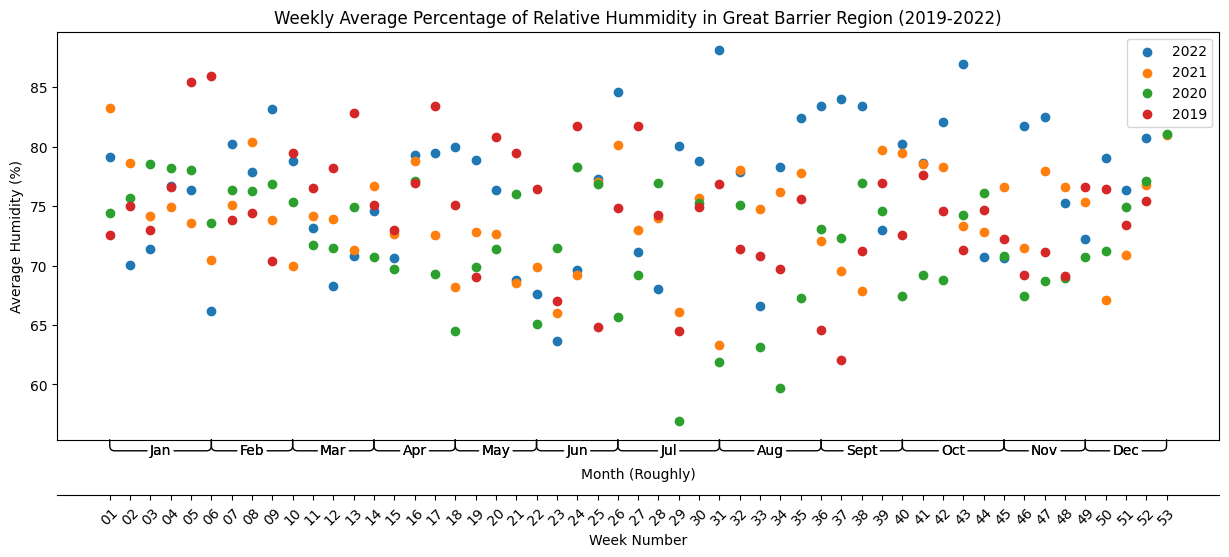

In [89]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplots_adjust(bottom=0.2)
ax.scatter(df_2022_weekly["WEEK"], df_2022_weekly["VALUES"], label="2022")
ax.scatter(df_2021_weekly["WEEK"], df_2021_weekly["VALUES"], label="2021")
ax.scatter(df_2020_weekly["WEEK"], df_2020_weekly["VALUES"], label="2020")
ax.scatter(df_2019_weekly["WEEK"], df_2019_weekly["VALUES"], label="2019")

ax.legend()
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Week Number")
ax.set_ylabel("Average Humidity (%)")
ax.set_title(
    "Weekly Average Percentage of Relative Hummidity in Great Barrier Region (2019-2022)"
)

groups = [
    ("Jan", (0, int(df_2022_weekly["WEEK"][4]))),
    ("Feb", (int(df_2022_weekly["WEEK"][4]), int(df_2022_weekly["WEEK"][8]))),
    ("Mar", (int(df_2022_weekly["WEEK"][8]), int(df_2022_weekly["WEEK"][12]))),
    ("Apr", (int(df_2022_weekly["WEEK"][12]), int(df_2022_weekly["WEEK"][16]))),
    ("May", (int(df_2022_weekly["WEEK"][16]), int(df_2022_weekly["WEEK"][20]))),
    ("Jun", (int(df_2022_weekly["WEEK"][20]), int(df_2022_weekly["WEEK"][24]))),
    ("Jul", (int(df_2022_weekly["WEEK"][24]), int(df_2022_weekly["WEEK"][29]))),
    ("Aug", (int(df_2022_weekly["WEEK"][29]), int(df_2022_weekly["WEEK"][34]))),
    ("Sept", (int(df_2022_weekly["WEEK"][34]), int(df_2022_weekly["WEEK"][38]))),
    ("Oct", (int(df_2022_weekly["WEEK"][38]), int(df_2022_weekly["WEEK"][43]))),
    ("Nov", (int(df_2022_weekly["WEEK"][43]), int(df_2022_weekly["WEEK"][47]))),
    ("Dec", (int(df_2022_weekly["WEEK"][47]), int(df_2022_weekly["WEEK"][51]))),
]
ax.spines["bottom"].set_position(("outward", 40))

make_second_bottom_spine(label="Month (Roughly)")

for name, xspan in groups:
    annotate_group(name, xspan)

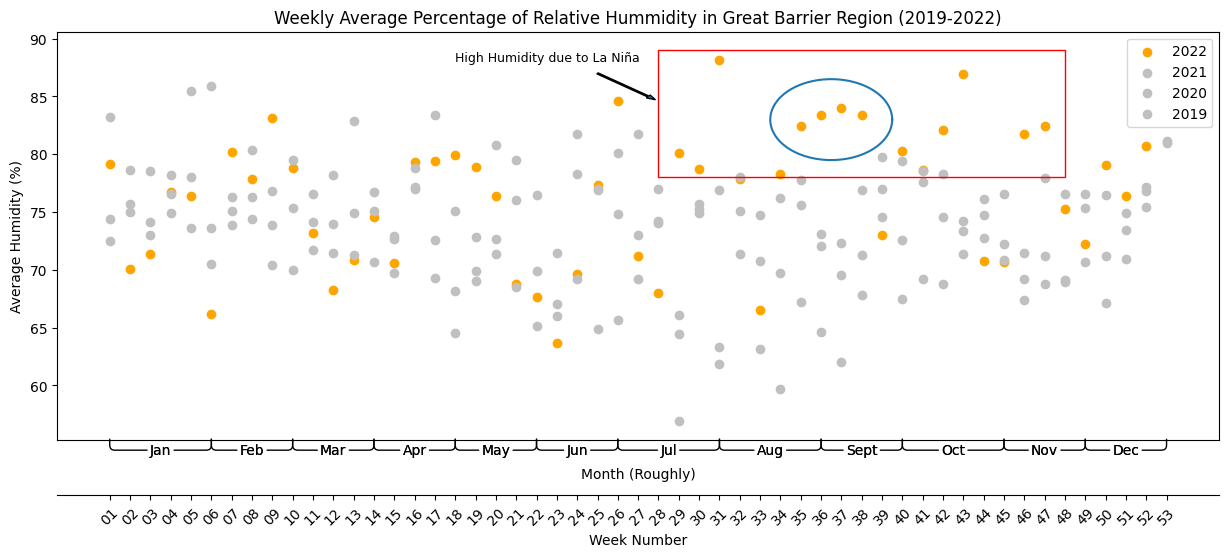

In [90]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.subplots_adjust(bottom=0.2)
ax.scatter(df_2022_weekly["WEEK"], df_2022_weekly["VALUES"], label="2022", c="orange")
ax.scatter(df_2021_weekly["WEEK"], df_2021_weekly["VALUES"], label="2021", c="silver")
ax.scatter(df_2020_weekly["WEEK"], df_2020_weekly["VALUES"], label="2020", c="silver")
ax.scatter(df_2019_weekly["WEEK"], df_2019_weekly["VALUES"], label="2019", c="silver")

ax.legend()
ax.tick_params(axis="x", labelrotation=45)
ax.set_xlabel("Week Number")
ax.set_ylabel("Average Humidity (%)")
ax.set_title(
    "Weekly Average Percentage of Relative Hummidity in Great Barrier Region (2019-2022)"
)

groups = [
    ("Jan", (0, int(df_2022_weekly["WEEK"][4]))),
    ("Feb", (int(df_2022_weekly["WEEK"][4]), int(df_2022_weekly["WEEK"][8]))),
    ("Mar", (int(df_2022_weekly["WEEK"][8]), int(df_2022_weekly["WEEK"][12]))),
    ("Apr", (int(df_2022_weekly["WEEK"][12]), int(df_2022_weekly["WEEK"][16]))),
    ("May", (int(df_2022_weekly["WEEK"][16]), int(df_2022_weekly["WEEK"][20]))),
    ("Jun", (int(df_2022_weekly["WEEK"][20]), int(df_2022_weekly["WEEK"][24]))),
    ("Jul", (int(df_2022_weekly["WEEK"][24]), int(df_2022_weekly["WEEK"][29]))),
    ("Aug", (int(df_2022_weekly["WEEK"][29]), int(df_2022_weekly["WEEK"][34]))),
    ("Sept", (int(df_2022_weekly["WEEK"][34]), int(df_2022_weekly["WEEK"][38]))),
    ("Oct", (int(df_2022_weekly["WEEK"][38]), int(df_2022_weekly["WEEK"][43]))),
    ("Nov", (int(df_2022_weekly["WEEK"][43]), int(df_2022_weekly["WEEK"][47]))),
    ("Dec", (int(df_2022_weekly["WEEK"][47]), int(df_2022_weekly["WEEK"][51]))),
]
ax.spines["bottom"].set_position(("outward", 40))

make_second_bottom_spine(label="Month (Roughly)")

for name, xspan in groups:
    annotate_group(name, xspan)

u = 35.5  # x-position of the center
v = 83  # y-position of the center
a = 3  # radius on the x-axis
b = 3.5  # radius on the y-axis

t = np.linspace(0, 2 * pi, 100)
plt.plot(u + a * np.cos(t), v + b * np.sin(t))

rect = patches.Rectangle((27, 78), 20, 11, linewidth=1, edgecolor="r", facecolor="none")
ax.add_patch(rect)

plt.text(17, 88, "High Humidity due to La Niña", fontsize=9)
plt.arrow(24, 87, 2.5, -2, width=0.1)